This example will walk you throught the basic usage of PromptBench. We hope that you can get familiar with the APIs and use it in your own projects later.

First, there is a unified import of `import promptbench as pb` that easily imports the package.

In [1]:
import promptbench as pb

/home/ubuntu/miniconda3/envs/am/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load dataset

First, PromptBench supports easy load of datasets.

In [2]:
# print all supported datasets in promptbench
print('All supported datasets: ')
print(pb.SUPPORTED_DATASETS)

# load a dataset, sst2, for instance.
# if the dataset is not available locally, it will be downloaded automatically.
dataset = pb.DatasetLoader.load_dataset("sst2")
# dataset = pb.DatasetLoader.load_dataset("mmlu")
# dataset = pb.DatasetLoader.load_dataset("un_multi")
# dataset = pb.DatasetLoader.load_dataset("iwslt2017", ["ar-en", "de-en", "en-ar"])
# dataset = pb.DatasetLoader.load_dataset("math", "algebra__linear_1d")
# dataset = pb.DatasetLoader.load_dataset("bool_logic")
# dataset = pb.DatasetLoader.load_dataset("valid_parenthesesss")

# print the first 5 examples
dataset[:5]

All supported datasets: 
['sst2', 'cola', 'qqp', 'mnli', 'mnli_matched', 'mnli_mismatched', 'qnli', 'wnli', 'rte', 'mrpc', 'mmlu', 'squad_v2', 'un_multi', 'iwslt2017', 'math', 'bool_logic', 'valid_parentheses', 'gsm8k', 'csqa', 'bigbench_date', 'bigbench_object_tracking', 'last_letter_concat', 'numersense', 'qasc', 'bbh', 'drop', 'arc-easy', 'arc-challenge']


[{'content': "it 's a charming and often affecting journey . ", 'label': 1},
 {'content': 'unflinchingly bleak and desperate ', 'label': 0},
 {'content': 'allows us to hope that nolan is poised to embark a major career as a commercial yet inventive filmmaker . ',
  'label': 1},
 {'content': "the acting , costumes , music , cinematography and sound are all astounding given the production 's austere locales . ",
  'label': 1},
 {'content': "it 's slow -- very , very slow . ", 'label': 0}]

## Load models

Then, you can easily load LLM models via promptbench.

In [3]:
# print all supported models in promptbench
print('All supported models: ')
print(pb.SUPPORTED_MODELS)

# load a model, flan-t5-large, for instance.
model = pb.LLMModel(model='google/flan-t5-large', max_new_tokens=10, temperature=0.0001, device='cuda')
# model = pb.LLMModel(model='llama2-13b-chat', max_new_tokens=10, temperature=0.0001)

All supported models: 
['google/flan-t5-large', 'llama2-7b', 'llama2-7b-chat', 'llama2-13b', 'llama2-13b-chat', 'llama2-70b', 'llama2-70b-chat', 'phi-1.5', 'phi-2', 'palm', 'gpt-3.5-turbo', 'gpt-4', 'gpt-4-1106-preview', 'gpt-3.5-turbo-1106', 'gpt-4-0125-preview', 'gpt-3.5-turbo-0125', 'gpt-4-turbo', 'gpt-4o', 'vicuna-7b', 'vicuna-13b', 'vicuna-13b-v1.3', 'google/flan-ul2', 'gemini-pro', 'mistralai/Mistral-7B-v0.1', 'mistralai/Mistral-7B-Instruct-v0.1', 'mistralai/Mixtral-8x7B-v0.1', 'mistralai/Mixtral-8x7B-Instruct-v0.1', '01-ai/Yi-6B', '01-ai/Yi-34B', '01-ai/Yi-6B-Chat', '01-ai/Yi-34B-Chat', 'baichuan-inc/Baichuan2-7B-Base', 'baichuan-inc/Baichuan2-13B-Base', 'baichuan-inc/Baichuan2-7B-Chat', 'baichuan-inc/Baichuan2-13B-Chat']


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## Construct prompt list

Prompts are the key interaction interface to LLMs. Some researches find that evaluating models through a single prompt is instable, so you can test the model by multiple prompts.

In [4]:
# using different prompts to evaluate models
prompt_list = [
    "Classify the sentence as positive or negative: {content}",
    "Determine the emotion of the following sentence as positive or negative: {content}",
    "Is the sentiment of this sentence positive or negative? {content}",
    "Identify whether the sentiment in the following sentence is positive or negative: {content}",
    "Assess the sentiment of this statement as either positive or negative: {content}",
    "Evaluate the following sentence and indicate if it is positive or negative: {content}",
    "Judge the emotional tone of this sentence as positive or negative: {content}",
    "Label the sentiment expressed in the sentence as positive or negative: {content}",
    "Decide if the sentiment in this statement is positive or negative: {content}",
    "Analyze the following sentence and determine if it is positive or negative: {content}",
    "Categorize the sentiment of the given sentence as positive or negative: {content}",
    "Tell if the following sentence conveys a positive or negative sentiment: {content}",
    "Discern whether the emotion in the sentence is positive or negative: {content}",
    "Determine if the given sentence expresses a positive or negative sentiment: {content}",
    "Conclude if the emotional tone of this sentence is positive or negative: {content}",
    "Recognize whether the sentiment of the following statement is positive or negative: {content}",
    "Rate the sentiment in this sentence as positive or negative: {content}",
    "Classify the emotional tone of the given sentence as positive or negative: {content}",
    "Identify the sentiment in this sentence and classify it as positive or negative: {content}",
    "Assess if the sentiment of the following statement is positive or negative: {content}",
    "Indicate whether the sentiment of this sentence is positive or negative: {content}",
    "Determine if the sentiment in this sentence is positive or negative: {content}",
    "Judge whether the following sentence has a positive or negative sentiment: {content}",
    "Analyze the emotional tone of the sentence and classify it as positive or negative: {content}",
    "Label the given sentence as having a positive or negative sentiment: {content}",
    "Evaluate whether the sentiment in the following sentence is positive or negative: {content}",
    "Categorize the given sentence based on whether its sentiment is positive or negative: {content}",
    "Determine the emotional quality of the sentence as positive or negative: {content}",
    "Is the emotional tone of this sentence positive or negative? {content}",
    "Discern the sentiment of the given sentence and label it as positive or negative: {content}"
]

You may need to define the projection function for the model output.
Since the output format defined in your prompts may be different from the model output.
For example, for sst2 dataset, the label are '0' and '1' to represent 'negative' and 'positive'.
But the model output is 'negative' and 'positive'.
So we need to define a projection function to map the model output to the label.

In [5]:
def proj_func(pred):
    mapping = {
        "positive": 1,
        "negative": 0
    }
    return mapping.get(pred, -1)

## Efficient evaluation using PromptEval
PromptEval provides an efficient evaluation method: by observing a small number of samples (5% total), we can predict the performance of the model on unseen samples (The experiments shows that the prediction error is usually within 2% of the true value), achieving high efficiency in evaluation. 

100%|██████████| 1200/1200 [01:31<00:00, 13.10it/s]


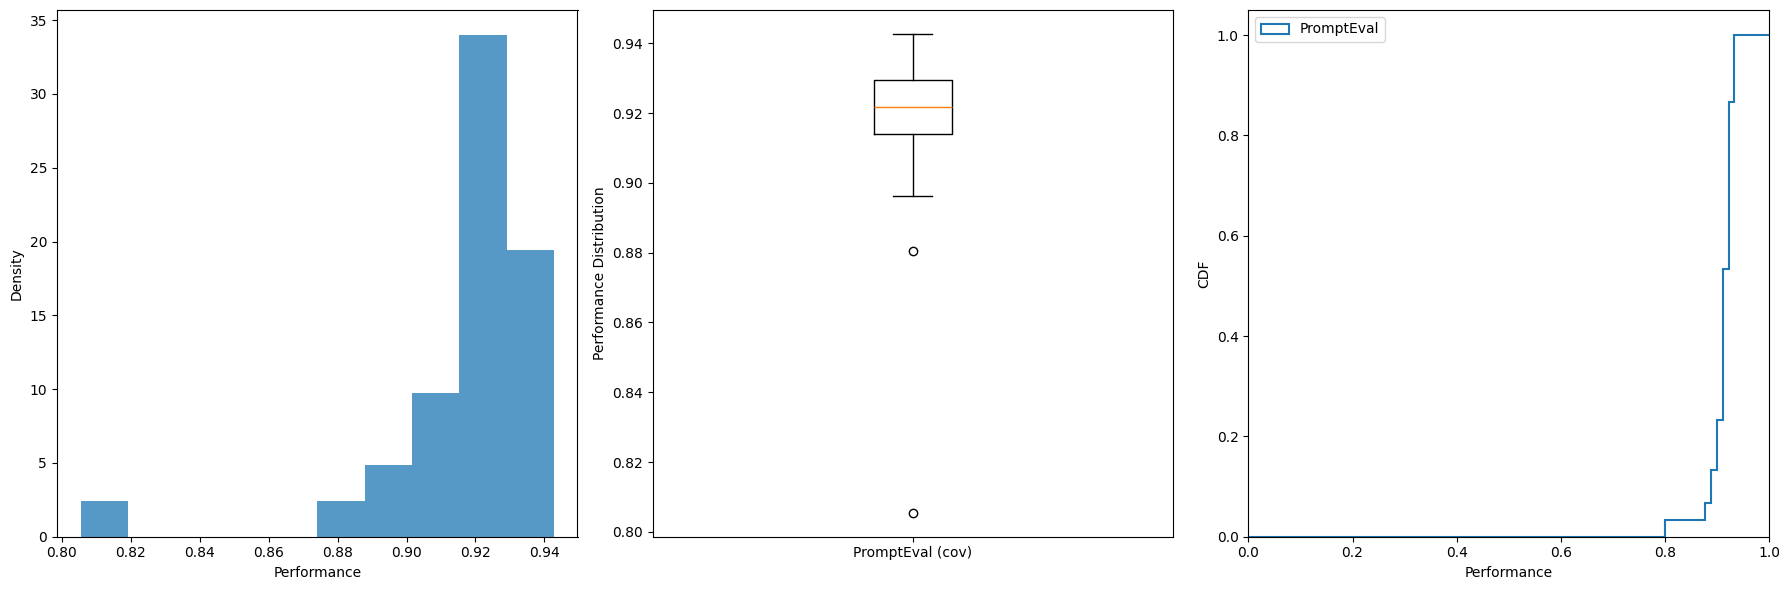

{'full_performances': array([0.92496036, 0.9296717 , 0.92268393, 0.91085103, 0.80544397,
       0.92159231, 0.92195513, 0.92742979, 0.94270547, 0.89704149,
       0.91374033, 0.91845134, 0.91761411, 0.91542801, 0.90279132,
       0.88043954, 0.90439775, 0.92869027, 0.89636597, 0.92093057,
       0.92079846, 0.92634561, 0.93064771, 0.9216495 , 0.93057201,
       0.92313046, 0.92961422, 0.93589523, 0.93857416, 0.94273073]), 'quantiles': {'5': 0.8876064332443163, '25': 0.9141622483781227, '50': 0.9218023145499467, '75': 0.9293832304634039, '95': 0.9408463788484324}, 'average': 0.9167714158726751, 'std_dev': 0.024776796648712244}


In [7]:
from promptbench.prompteval import efficient_eval

result = efficient_eval(model, prompt_list, dataset, proj_func, 
                        budget=1200,  # The maximum number of examples that can be evaluated during the process. Increasing this value covers more data points, while decreasing it reduces computation.
                        visualize=True,  # If set to True, the function will generate and display visualizations of the model's performance (combined_result.png), including histograms, boxplots, and cumulative distribution functions (CDFs).
                        pca_dim=25,  # The number of dimensions retained during PCA on the prompt embeddings. Higher values retain more dimensional information, while lower values reduce dimensionality.
                        method='EmbPT')  # The evaluation method to use. 'EmbPT' involves embedding the prompts and using these embeddings in model fitting. 'Rasch' does not obtain prompt embeddings; instead, prompts are one-hot encoded in this method.

print(result)